In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load the Food-101 dataset
(ds_train, ds_test), ds_info = tfds.load('food101', split=['train', 'validation'], with_info=True, as_supervised=True)

In [ ]:
# Function to preprocess images
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize images
    image = image / 255.0  # Normalize images
    return image, label
# Apply preprocessing
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(ds_train, validation_data=ds_test, epochs=3)

Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 2765s 1s/step - accuracy: 0.1432 - loss: 3.7051 - val_accuracy: 0.1952 - val_loss: 3.3815
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 2775s 1s/step - accuracy: 0.2200 - loss: 3.2771 - val_accuracy: 0.2119 - val_loss: 3.3330
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 2766s 1s/step - accuracy: 0.2872 - loss: 2.9308 - val_accuracy: 0.1918 - val_loss: 3.5996


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test accuracy: {test_acc:.3f}')

790/790 ━━━━━━━━━━━━━━━━━━━━ 273s 345ms/step - accuracy: 0.1915 - loss: 3.5882
Test accuracy: 0.192


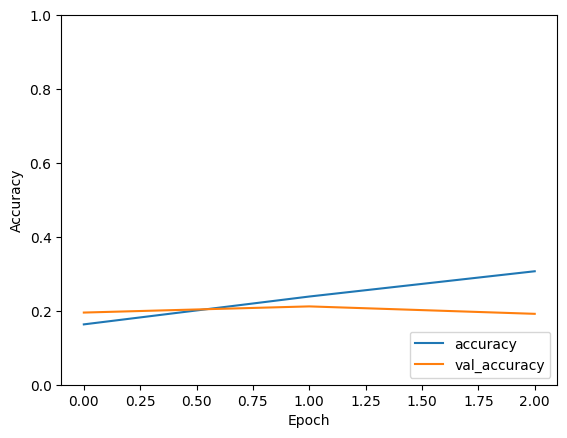

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

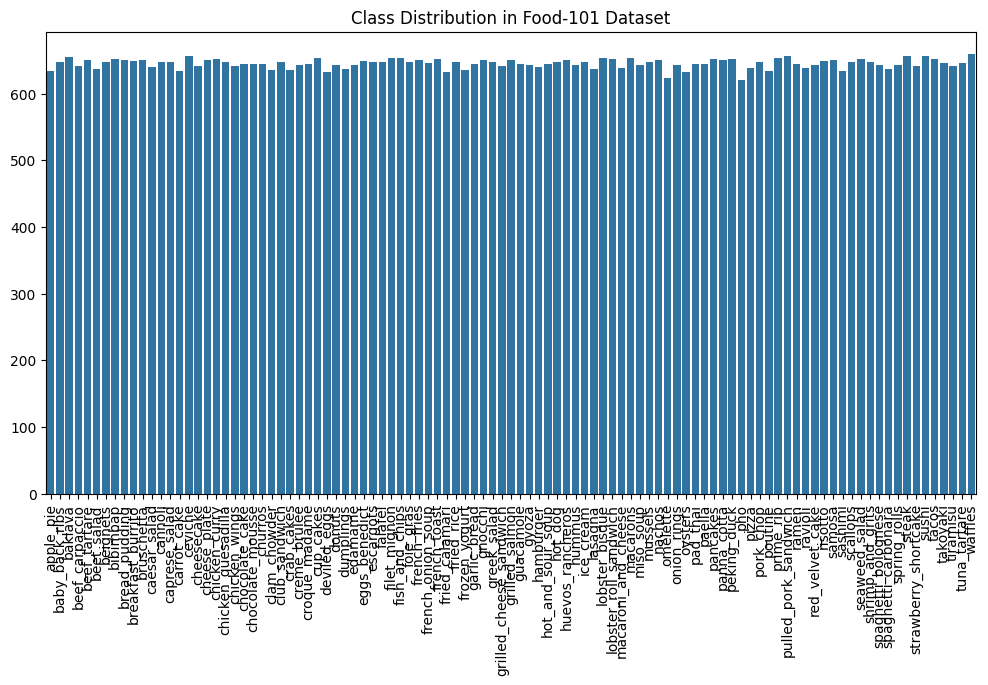

In [ ]:
import numpy as np
import seaborn as sns
# Explore class distribution
def plot_class_distribution():
    label_names = [ds_info.features['label'].int2str(i) for i in range(ds_info.features['label'].num_classes)]
    counts = np.zeros(ds_info.features['label'].num_classes)
    for _, label in ds_train:
        counts[label.numpy()] += 1
    plt.figure(figsize=(12, 6))
    sns.barplot(x=label_names, y=counts)
    plt.xticks(rotation=90)
    plt.title('Class Distribution in Food-101 Dataset')
    plt.show()
plot_class_distribution()

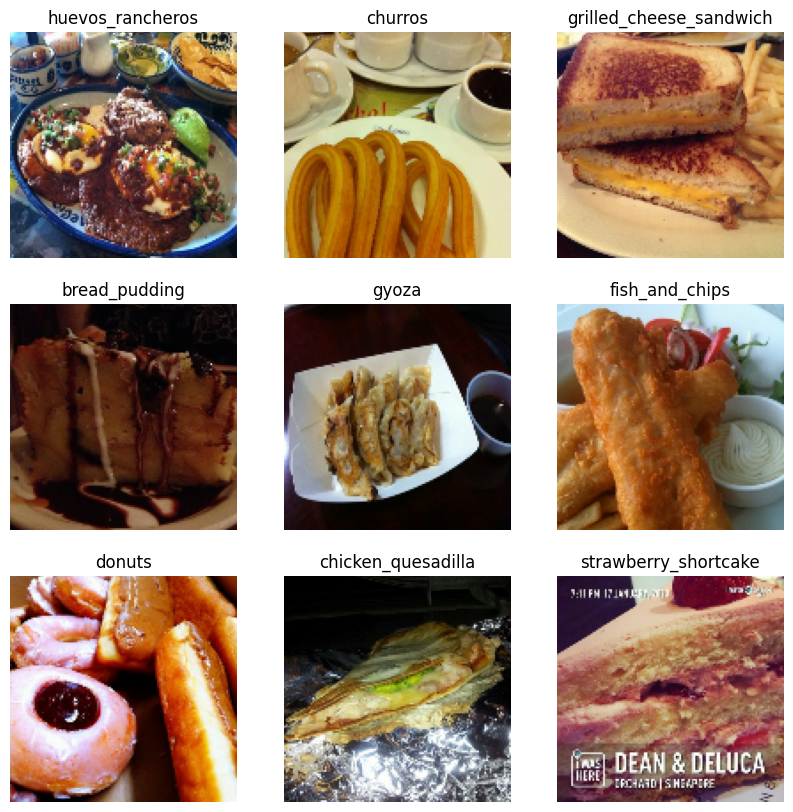

In [ ]:
# Visualize some sample images
def visualize_samples():
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(ds_train.take(9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[0].numpy())
        plt.title(ds_info.features['label'].int2str(label[0].numpy()))
        plt.axis("off")
visualize_samples()

In [ ]:
# Evaluate the model and generate classification report
y_true, y_pred = [], []
for images, labels in ds_test:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

print(classification_report(y_true, y_pred, target_names=ds_info.features['label'].names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

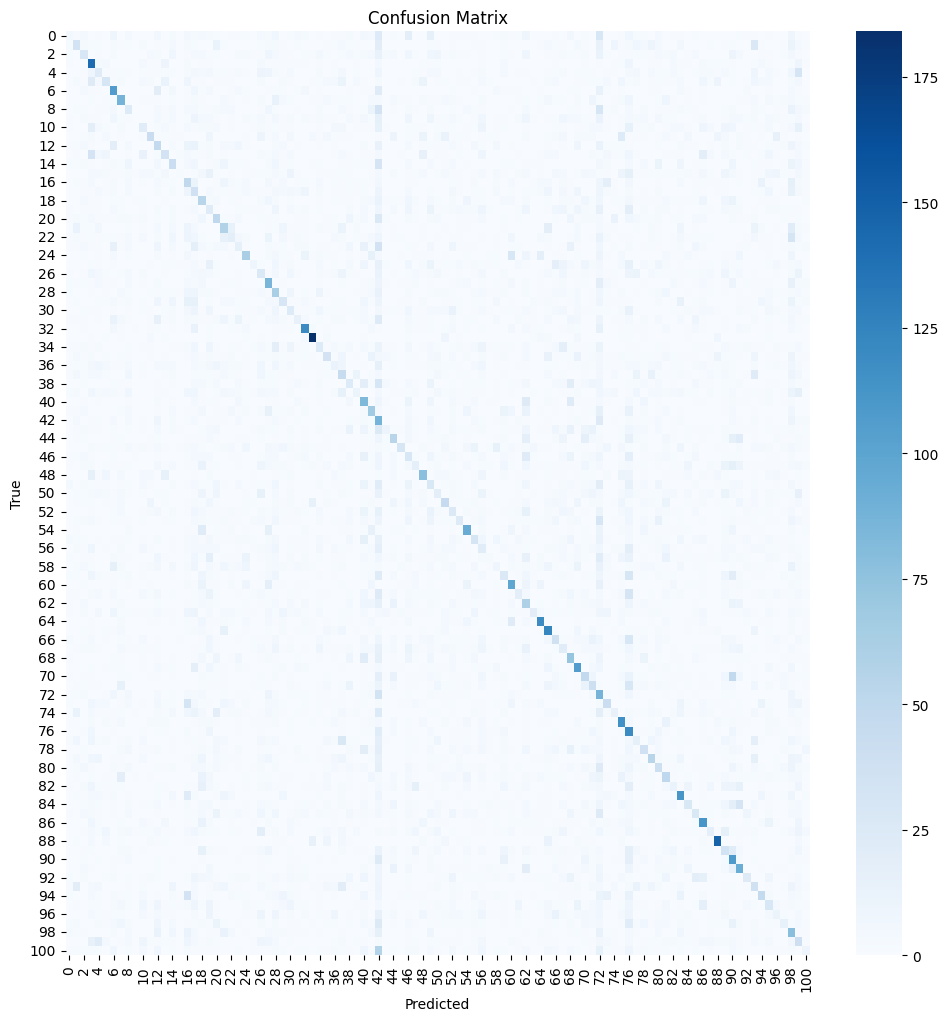

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Insights from Confusion Matrix
def analyze_confusion_matrix():
    most_confused = np.unravel_index(np.argmax(conf_matrix, axis=None), conf_matrix.shape)
    print(f"The most confused classes are '{ds_info.features['label'].int2str(most_confused[0])}' and '{ds_info.features['label'].int2str(most_confused[1])}'.")
analyze_confusion_matrix()

The most confused classes are 'edamame' and 'edamame'.


In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
# Function to estimate calorie content (simple example)
def estimate_calories(label):
    # Placeholder dictionary for calories (you would need a real database for accurate values)
    food_calories = {
        0: 200,  # Example food 1
        1: 150,  # Example food 2
        # Add mappings for all 101 classes
    }
    return food_calories.get(label, "Unknown food item")

In [ ]:
# Predict on a sample image
for image, label in ds_test.take(1):
    predictions = model.predict(image)
    predicted_label = tf.argmax(predictions[0]).numpy()
    print(f"Predicted food item: {ds_info.features['label'].int2str(predicted_label)}")
    print(f"Estimated calories: {estimate_calories(predicted_label)} kcal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Predicted food item: pancakes
Estimated calories: Unknown food item kcal
